In [1]:
import pandas as pd
import numpy as np
#Collection of text Document into matrix of token count
from sklearn.feature_extraction.text import CountVectorizer

#import different ML classifiers
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#import ML evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection

#import scikitplot to plot confusion matrix
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
# data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/website-data/master/dataset.csv")
data = pd.read_csv("dataset.csv")
data.head()

,type,posts,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,INTJ,know intj tool use interaction people excuse a...,NaN,NaN,NaN
1,INTJ,rap music ehh opp yeah know valid well know fa...,NaN,NaN,NaN
2,INTJ,preferably p hd low except wew lad video p min...,NaN,NaN,NaN
3,INTJ,drink like wish could drink red wine give head...,NaN,NaN,NaN
4,INTJ,space program ah bad deal meing freelance max ...,NaN,NaN,NaN


In [3]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)

In [4]:
data

,type,posts
0,INTJ,know intj tool use interaction people excuse a...
1,INTJ,rap music ehh opp yeah know valid well know fa...
2,INTJ,preferably p hd low except wew lad video p min...
3,INTJ,drink like wish could drink red wine give head...
4,INTJ,space program ah bad deal meing freelance max ...
...,...,...
106062,INFP,stay frustrate world life want take long nap w...
106063,INFP,fizzle around time mention sure mistake thing ...
106064,INFP,schedule modify hey w intp strong wing underst...
106065,INFP,enfj since january busy schedule able spend li...


In [5]:
# Shuffle the dataframe
data = data.sample(frac=1).reset_index(drop=True)
data

,type,posts
0,ENFJ,shine unconsciously give people permission lib...
1,INTP,truth go beyond surface look inner world subje...
2,INTP,make black people saw like black panther know ...
3,INTP,dna get rough estimate long ago two individual...
4,INTP,educational task interest sheer variety mean e...
...,...,...
106062,INTJ,taste side hopefully seek also think throw peo...
106063,INTP,good mat straight man put huge amount work ord...
106064,ENFP,year neither say anything really awckward hang...
106065,INFJ,friend stop say hey go side try cause anything...


In [9]:
data.info()    #dataset do not contain any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   type    106067 non-null  object
 1   posts   106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [10]:
data.isnull().sum()           # returns the number of missing values in the data set.

type     0
posts    0
dtype: int64

In [11]:
data["type"].value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [12]:
x = data["posts"]
y = data["type"]

In [13]:
data=x
target=y

In [14]:
CV = CountVectorizer()
X = CV.fit_transform(x)
X

<106067x256389 sparse matrix of type '<class 'numpy.int64'>'
	with 35642761 stored elements in Compressed Sparse Row format>

In [15]:
#Split Train Test function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
# Models


MultinomialNB:
              precision    recall  f1-score   support

        ENFJ       0.27      0.01      0.02       531
        ENFP       0.91      0.08      0.15      2002
        ENTJ       0.99      0.16      0.28      1016
        ENTP       0.75      0.55      0.63      3882
        ESFJ       0.00      0.00      0.00        76
        ESFP       0.00      0.00      0.00       131
        ESTJ       0.97      0.38      0.54       149
        ESTP       0.98      0.56      0.72       657
        INFJ       0.57      0.81      0.67      4966
        INFP       0.65      0.65      0.65      4020
        INTJ       0.67      0.84      0.75      7367
        INTP       0.66      0.88      0.75      8185
        ISFJ       0.00      0.00      0.00       220
        ISFP       0.00      0.00      0.00       276
        ISTJ       0.00      0.00      0.00       411
        ISTP       0.87      0.11      0.19      1114

    accuracy                           0.66     35003
   macro av

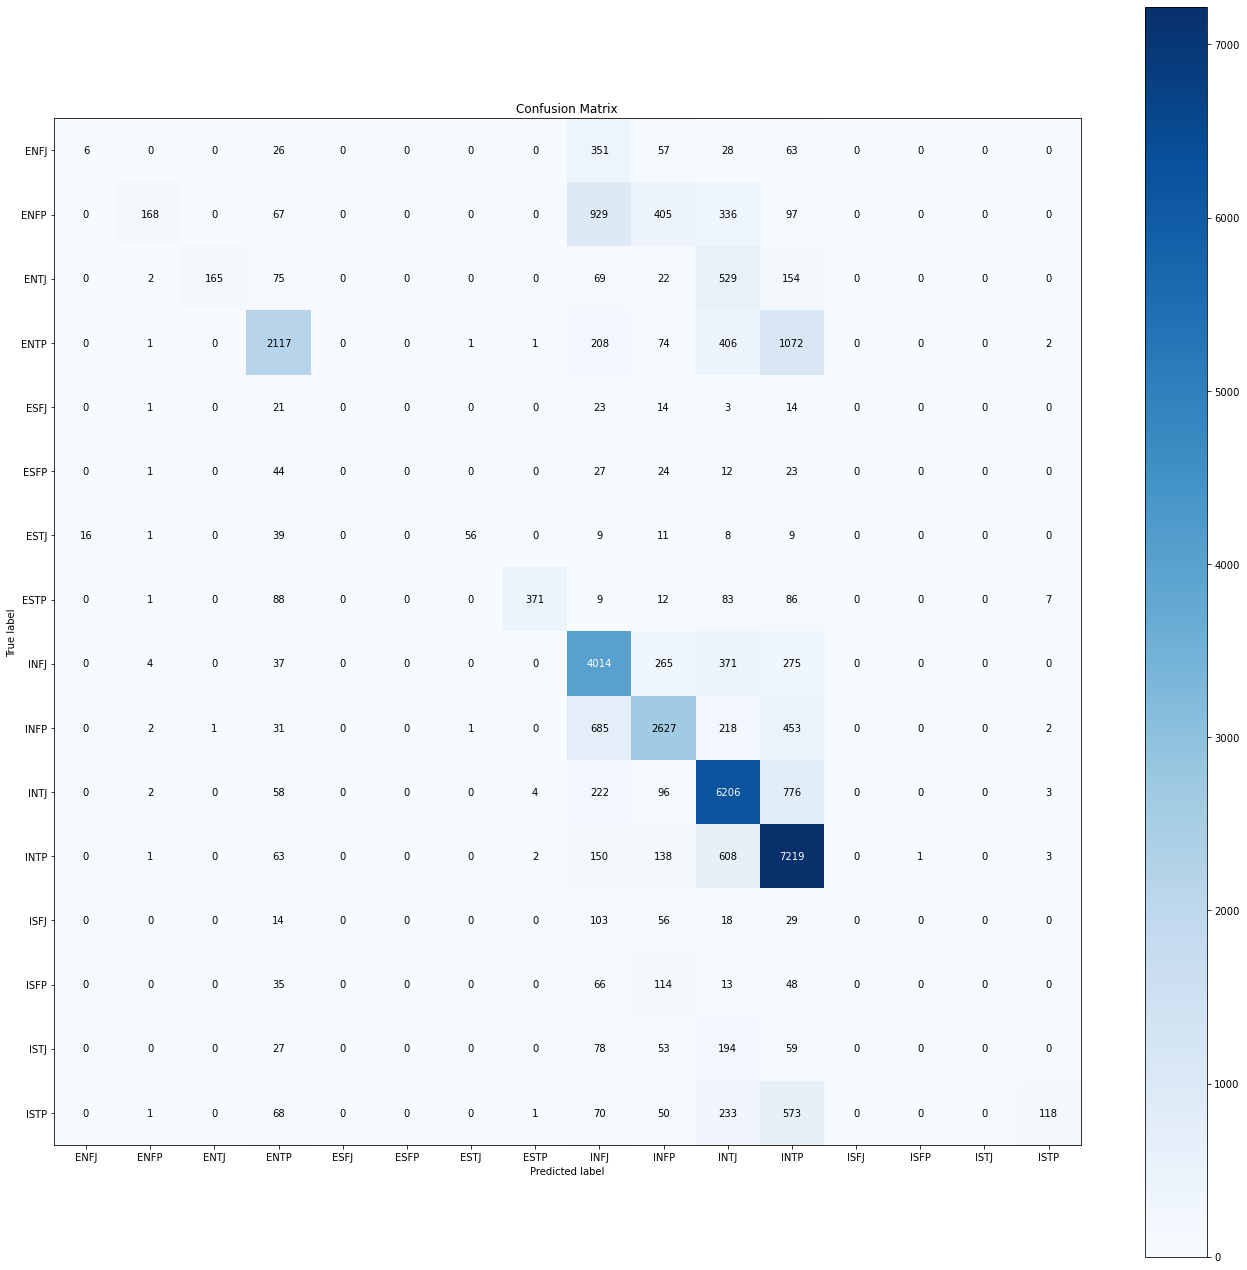

In [33]:
# MultinomialNB                          #0.6580007427934749
import warnings
warnings.filterwarnings('ignore')
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print("MultinomialNB:")
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

In [ ]:
# SVC
import warnings
warnings.filterwarnings('ignore')
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print("SVC:")
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

60.07485072708053
BernoulliNB:
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       531
        ENFP       0.33      0.00      0.00      2002
        ENTJ       0.97      0.10      0.18      1016
        ENTP       0.77      0.35      0.48      3882
        ESFJ       0.00      0.00      0.00        76
        ESFP       0.00      0.00      0.00       131
        ESTJ       1.00      0.03      0.05       149
        ESTP       1.00      0.17      0.29       657
        INFJ       0.55      0.76      0.64      4966
        INFP       0.65      0.51      0.57      4020
        INTJ       0.61      0.85      0.71      7367
        INTP       0.58      0.89      0.70      8185
        ISFJ       0.00      0.00      0.00       220
        ISFP       0.00      0.00      0.00       276
        ISTJ       0.00      0.00      0.00       411
        ISTP       0.71      0.02      0.03      1114

    accuracy                           0.60     3

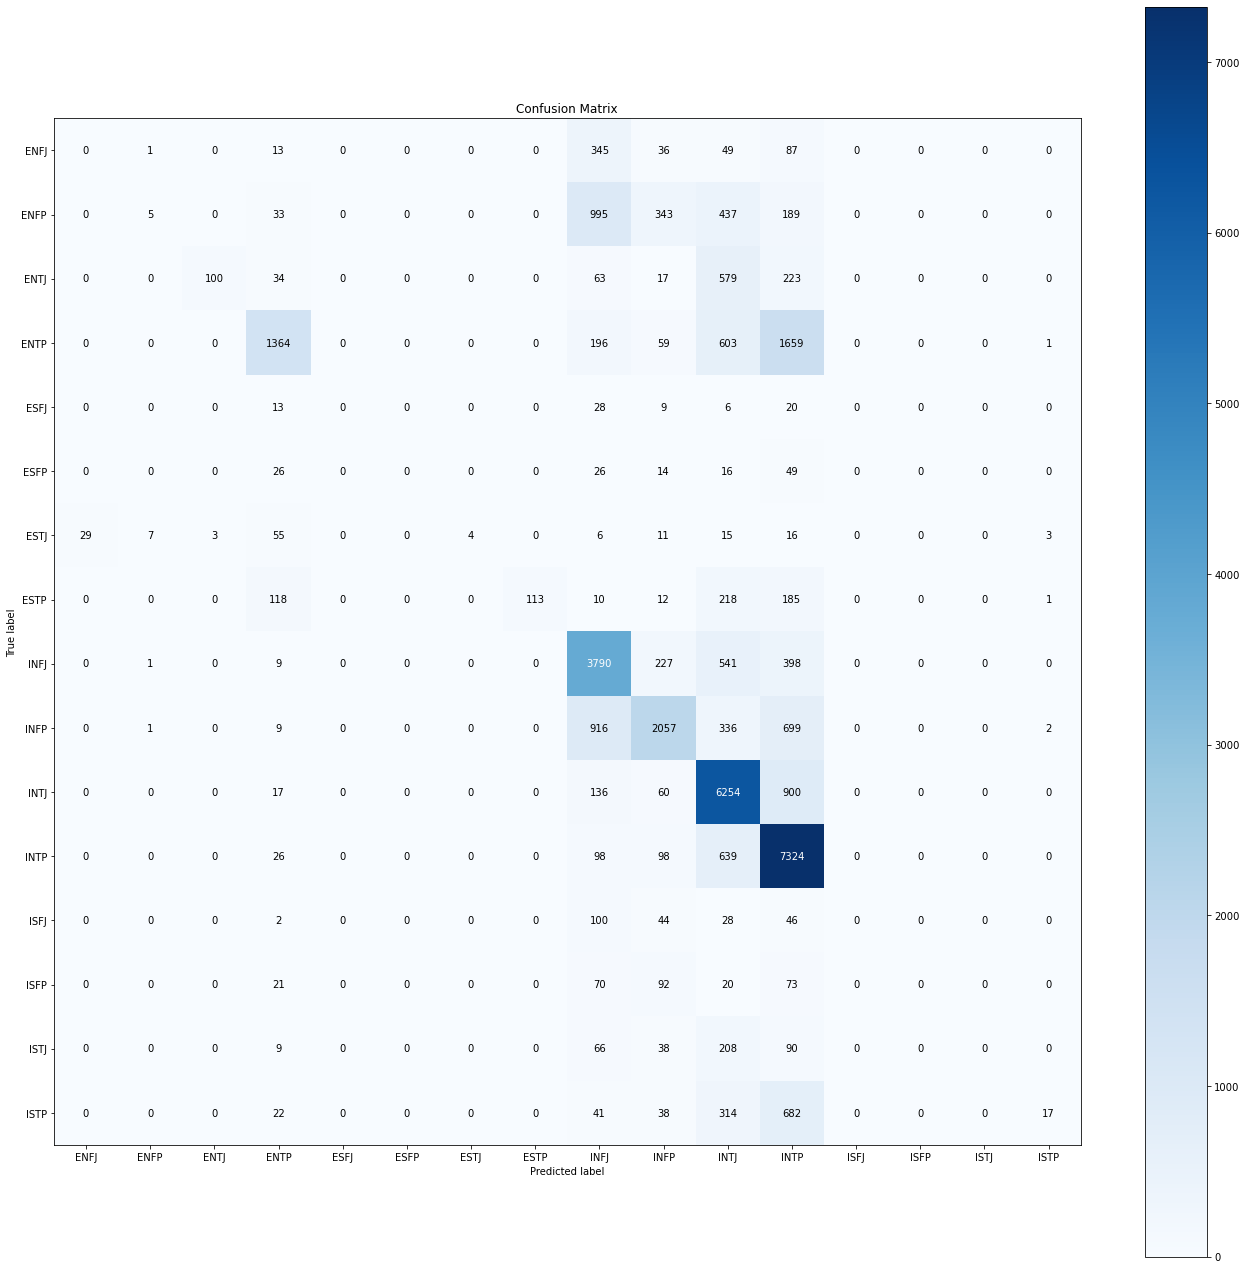

In [34]:
# BernoulliNB                           #0.6006628003314002
import warnings
warnings.filterwarnings('ignore')
model = BernoulliNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(str(model_acc))
print("BernoulliNB:")
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

In [26]:
# # GaussianNB
# import warnings
# warnings.filterwarnings('ignore')

# import warnings
# warnings.filterwarnings('ignore')

# from scipy.sparse import csr_matrix

# # Convert X_train and X_test to dense numpy arrays
# X_train_dense = X_train.toarray()
# X_test_dense = X_test.toarray()

# # Train the model
# model = GaussianNB()
# model.fit(X_train_dense, y_train)

# # Make predictions
# pred = model.predict(X_test_dense)

# print("GaussianNB:")
# model_acc = accuracy_score(y_test, pred) * 100
# print(classification_report(y_test, pred))
# print(confusion_matrix(y_test, pred))
# print()


LogisticRegression:
              precision    recall  f1-score   support

        ENFJ       0.72      0.62      0.67       531
        ENFP       0.77      0.75      0.76      2002
        ENTJ       0.82      0.71      0.76      1016
        ENTP       0.82      0.78      0.80      3882
        ESFJ       0.80      0.42      0.55        76
        ESFP       0.86      0.42      0.56       131
        ESTJ       0.95      0.74      0.83       149
        ESTP       0.89      0.92      0.91       657
        INFJ       0.81      0.81      0.81      4966
        INFP       0.79      0.80      0.79      4020
        INTJ       0.81      0.84      0.82      7367
        INTP       0.82      0.86      0.84      8185
        ISFJ       0.72      0.54      0.61       220
        ISFP       0.65      0.61      0.63       276
        ISTJ       0.65      0.67      0.66       411
        ISTP       0.83      0.76      0.79      1114

    accuracy                           0.81     35003
   mac

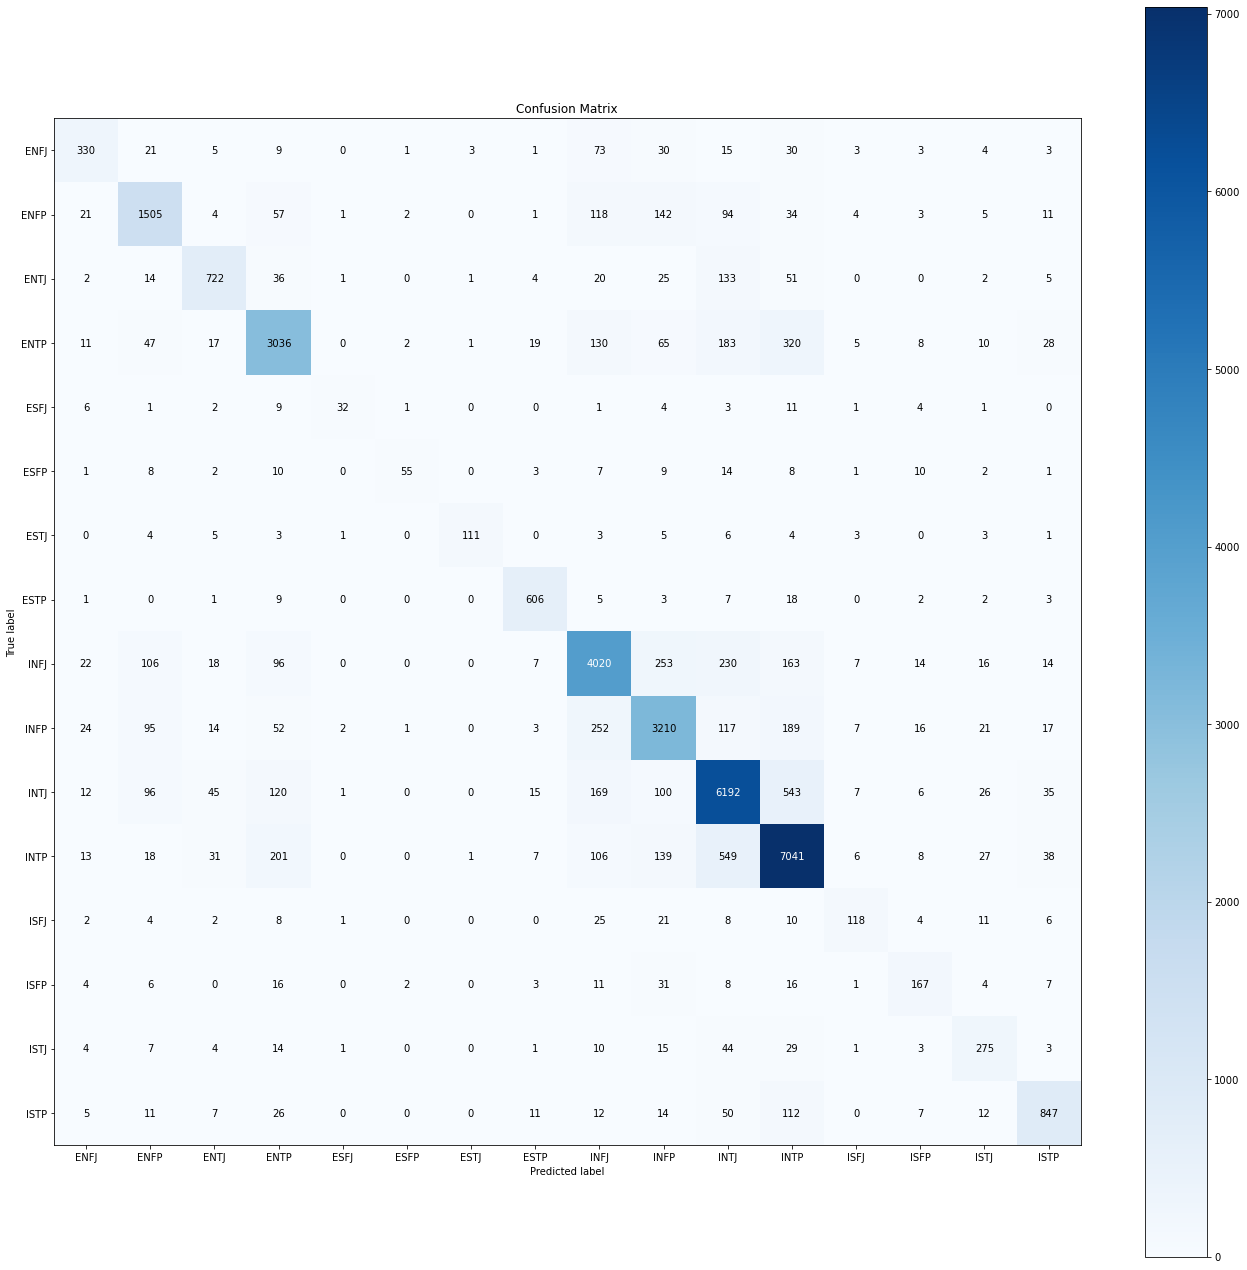

In [27]:
# LogisticRegression
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("LogisticRegression:")
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

RandomForestClassifier:
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       531
        ENFP       0.92      0.03      0.06      2002
        ENTJ       1.00      0.08      0.15      1016
        ENTP       0.79      0.22      0.34      3882
        ESFJ       0.00      0.00      0.00        76
        ESFP       0.00      0.00      0.00       131
        ESTJ       0.90      0.57      0.70       149
        ESTP       0.98      0.28      0.44       657
        INFJ       0.64      0.59      0.62      4966
        INFP       0.72      0.31      0.44      4020
        INTJ       0.50      0.74      0.60      7367
        INTP       0.44      0.87      0.58      8185
        ISFJ       0.00      0.00      0.00       220
        ISFP       0.00      0.00      0.00       276
        ISTJ       0.00      0.00      0.00       411
        ISTP       1.00      0.00      0.01      1114

    accuracy                           0.52     35003
  

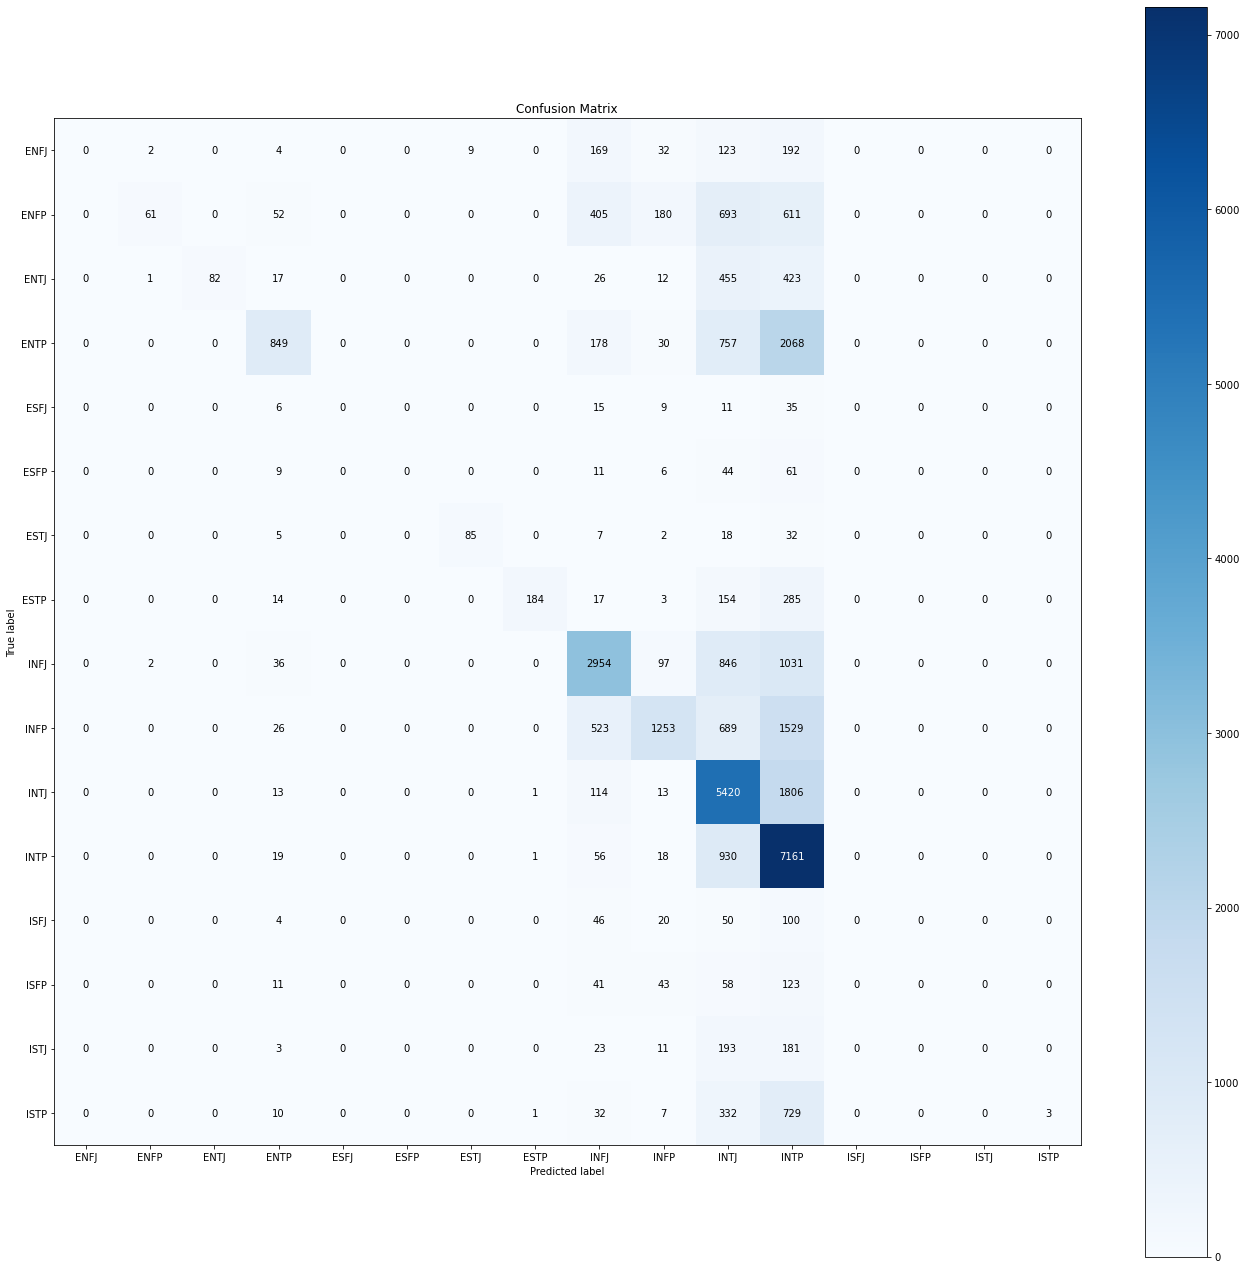

In [35]:
# RandomForestClassifier                     #52%
import warnings
warnings.filterwarnings('ignore')
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("RandomForestClassifier:")
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

DecisionTreeClassifier:
              precision    recall  f1-score   support

        ENFJ       0.18      0.14      0.15       531
        ENFP       0.51      0.51      0.51      2002
        ENTJ       0.44      0.40      0.42      1016
        ENTP       0.54      0.54      0.54      3882
        ESFJ       0.02      0.01      0.02        76
        ESFP       0.01      0.01      0.01       131
        ESTJ       0.25      0.21      0.23       149
        ESTP       0.61      0.57      0.59       657
        INFJ       0.61      0.60      0.60      4966
        INFP       0.59      0.60      0.59      4020
        INTJ       0.67      0.68      0.68      7367
        INTP       0.69      0.72      0.71      8185
        ISFJ       0.12      0.10      0.11       220
        ISFP       0.15      0.13      0.14       276
        ISTJ       0.29      0.28      0.29       411
        ISTP       0.48      0.47      0.48      1114

    accuracy                           0.60     35003
  

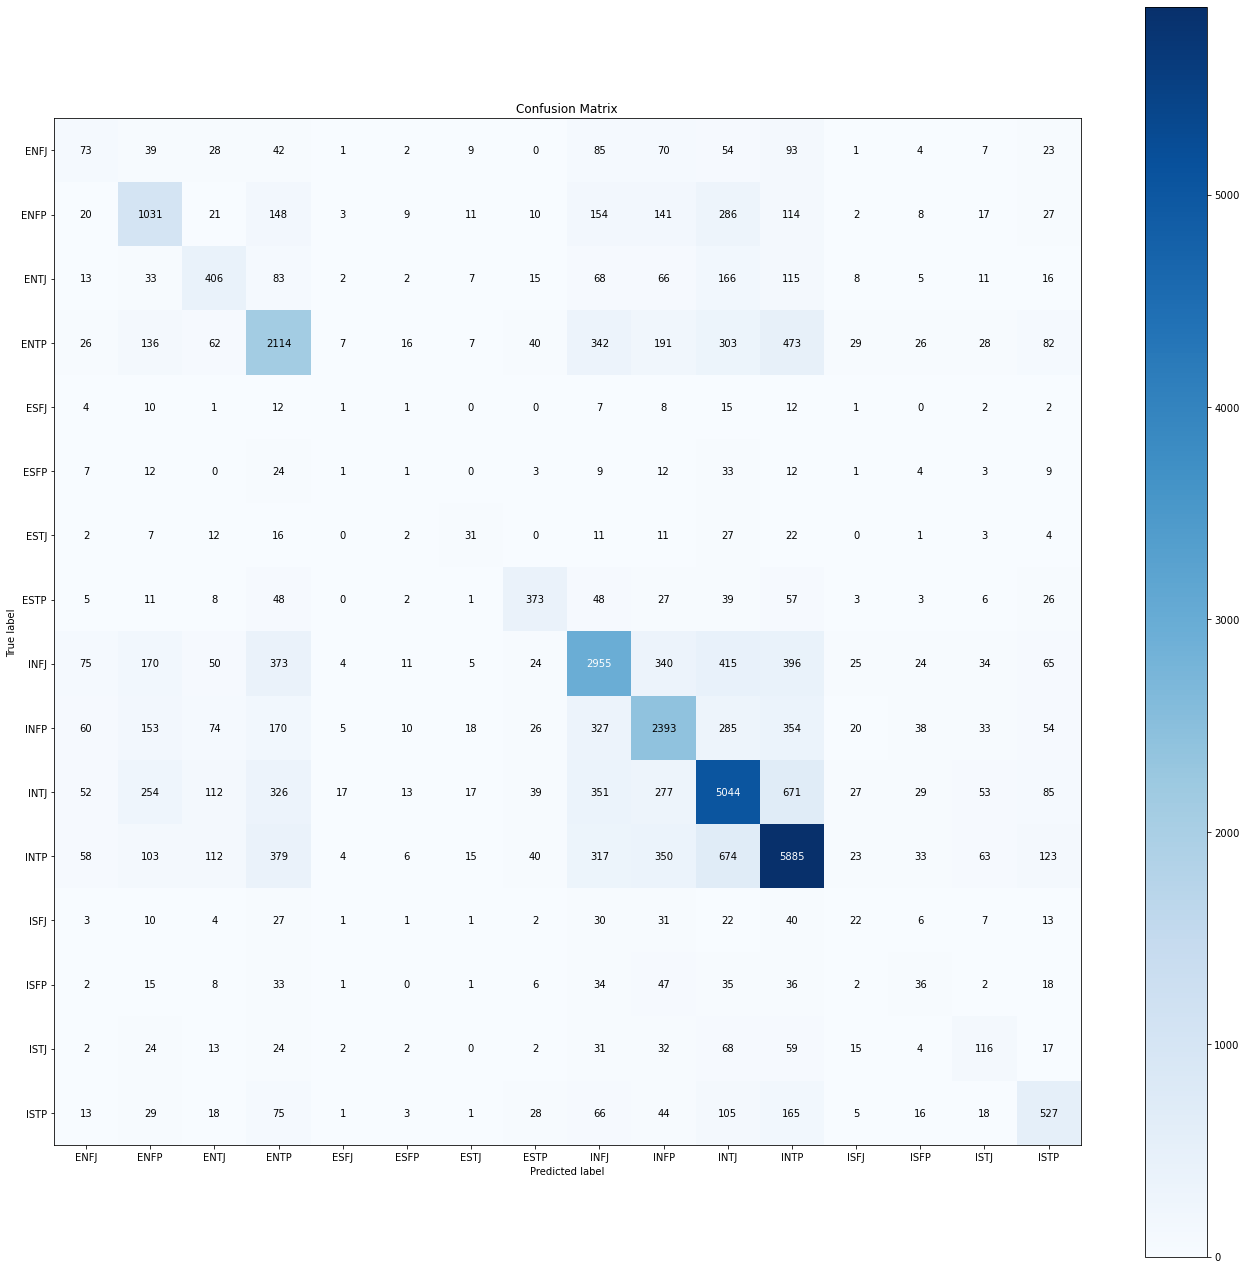

In [36]:
# DecisionTreeClassifier                         #59.9%
import warnings
warnings.filterwarnings('ignore')
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("DecisionTreeClassifier:")
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()


In [40]:
# # MLPClassifier                         #0.802788332428649
# import warnings
# warnings.filterwarnings('ignore')
# model = MLPClassifier()
# model.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
# pred = model.predict(X_test.toarray())  # Convert sparse matrix to dense array
# print("MLPClassifier:")
# #calcualte and print accuracy
# model_acc = accuracy_score(y_test, pred)*100
# print(classification_report(y_test, pred))
# #draw confusion matrix using sci-kit plot
# skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
# print()

KNeighborsClassifier:
              precision    recall  f1-score   support

        ENFJ       0.12      0.20      0.15       531
        ENFP       0.24      0.47      0.32      2002
        ENTJ       0.26      0.24      0.25      1016
        ENTP       0.36      0.38      0.37      3882
        ESFJ       0.80      0.05      0.10        76
        ESFP       0.15      0.16      0.15       131
        ESTJ       0.82      0.44      0.58       149
        ESTP       0.76      0.40      0.52       657
        INFJ       0.42      0.55      0.48      4966
        INFP       0.46      0.40      0.43      4020
        INTJ       0.55      0.42      0.48      7367
        INTP       0.51      0.54      0.53      8185
        ISFJ       0.45      0.02      0.04       220
        ISFP       0.57      0.05      0.09       276
        ISTJ       0.38      0.04      0.08       411
        ISTP       0.54      0.11      0.19      1114

    accuracy                           0.43     35003
   m

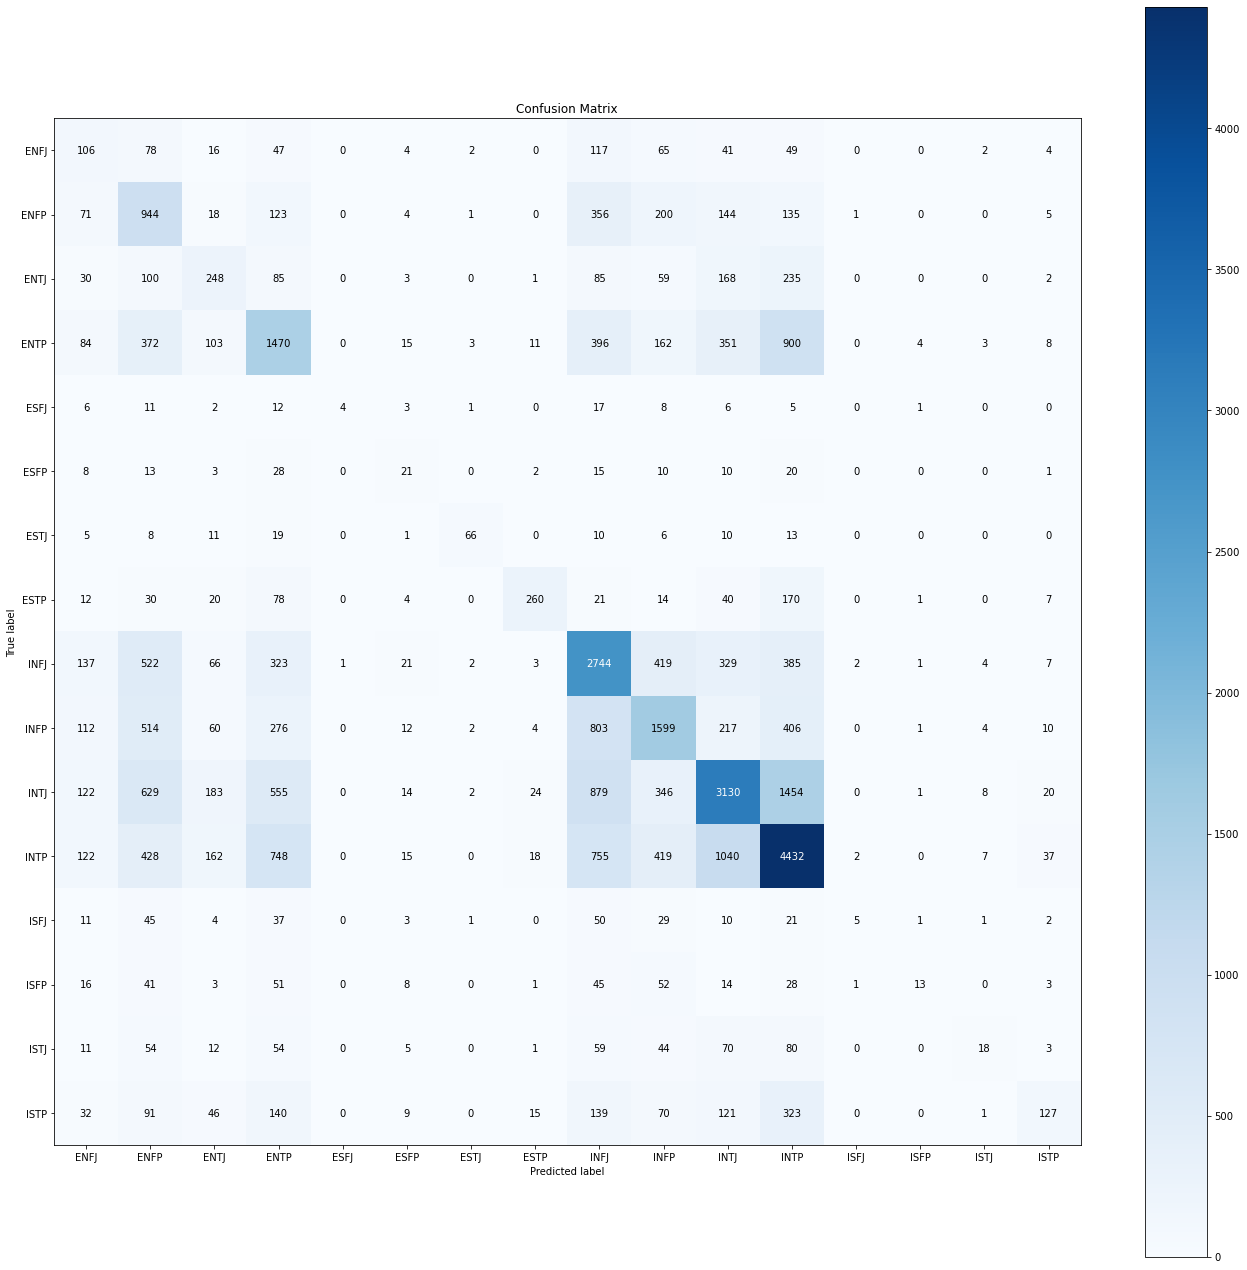

In [37]:
# KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("KNeighborsClassifier:")
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

LinearSVC:
              precision    recall  f1-score   support

        ENFJ       0.65      0.59      0.62       531
        ENFP       0.73      0.72      0.73      2002
        ENTJ       0.77      0.75      0.76      1016
        ENTP       0.75      0.73      0.74      3882
        ESFJ       0.37      0.33      0.35        76
        ESFP       0.58      0.44      0.50       131
        ESTJ       0.70      0.70      0.70       149
        ESTP       0.91      0.85      0.88       657
        INFJ       0.76      0.78      0.77      4966
        INFP       0.75      0.75      0.75      4020
        INTJ       0.78      0.80      0.79      7367
        INTP       0.79      0.81      0.80      8185
        ISFJ       0.57      0.46      0.51       220
        ISFP       0.55      0.50      0.52       276
        ISTJ       0.65      0.57      0.61       411
        ISTP       0.78      0.74      0.76      1114

    accuracy                           0.77     35003
   macro avg   

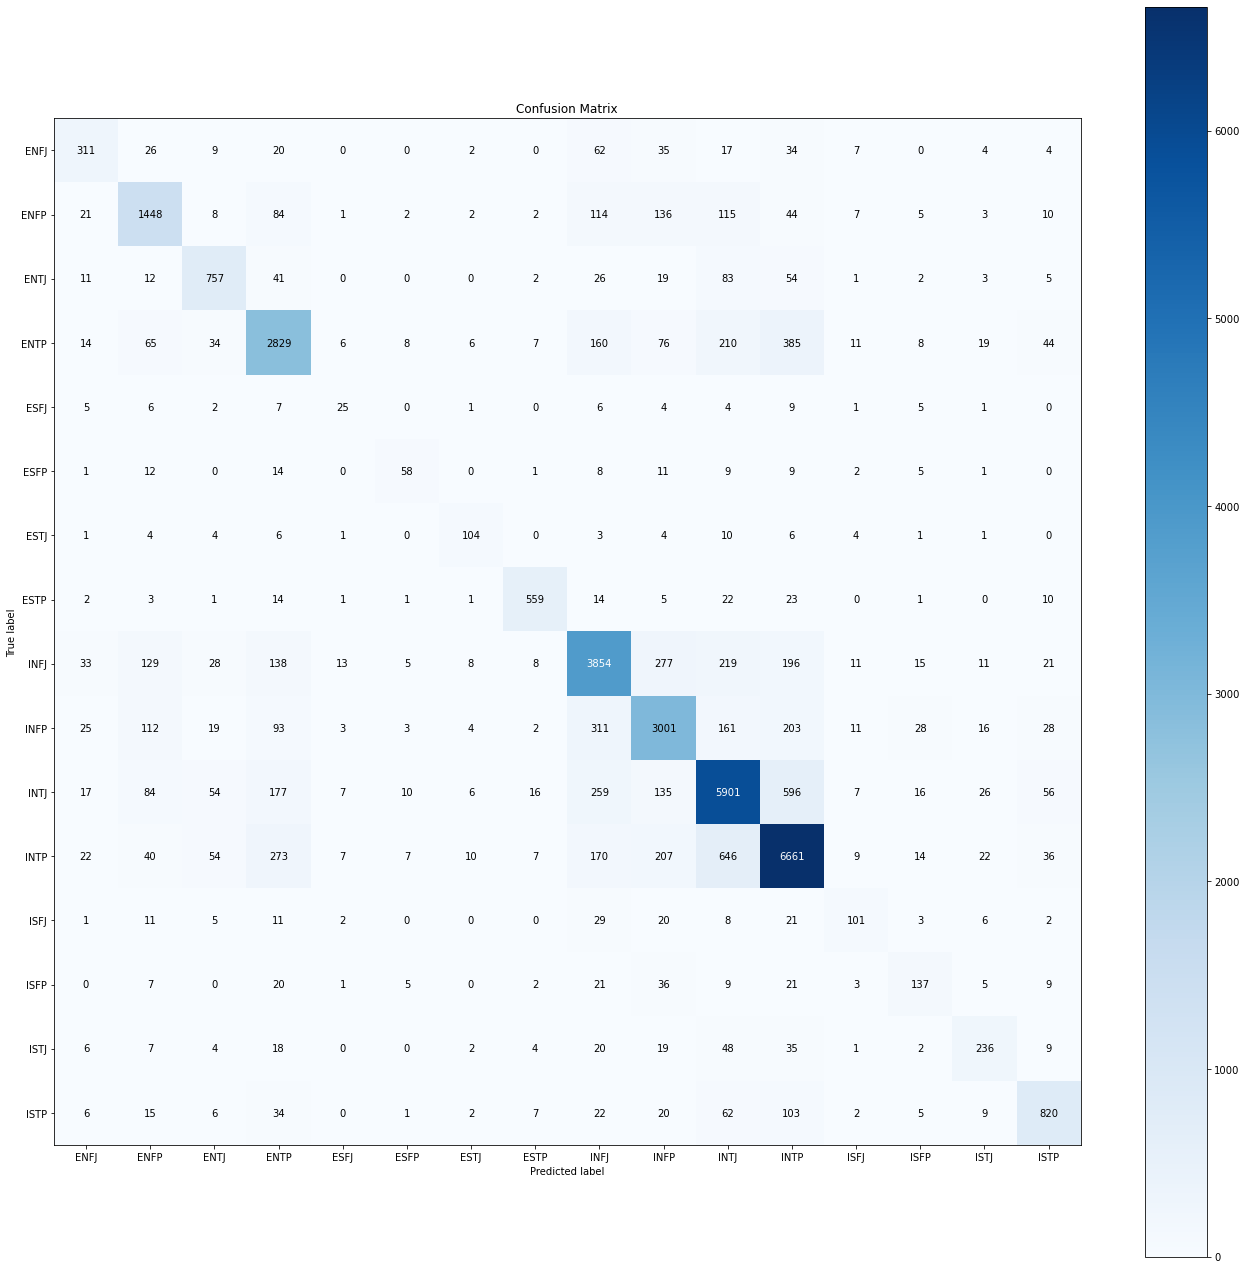

In [38]:
# LinearSVC
import warnings
warnings.filterwarnings('ignore')
model = LinearSVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("LinearSVC:")
#calcualte and print accuracy
model_acc = accuracy_score(y_test, pred)*100
print(classification_report(y_test, pred))
#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix( y_test,pred, normalize=False, title="Confusion Matrix", cmap="Blues",figsize=(23,23))
print()

In [32]:
user = input("Enter Text: ")
entered_data = CV.transform([user]).toarray()
output=model.predict(entered_data)
print("Type of Person is ",output)

Enter Text: We are always willing to help those in need.
Type of Person is  ['ENTJ']


In [18]:
# I willuse this clean dataset for testing on above models
import pandas as pd
import re


df = pd.read_csv("mbti_1.csv")

# Remove links from the 'posts' column
df['posts'] = df['posts'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Remove irrelevant information
# Example: Remove '|||' and subsequent text in 'posts' column
df['posts'] = df['posts'].apply(lambda x: re.split(r'\|\|\|', x)[0])

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

print("Data cleaning completed. Cleaned data saved to 'cleaned_data.csv'.")


PermissionError: [Errno 13] Permission denied: 'cleaned_data.csv'